# k-means Clustering

## Table of contents

[1.) Simple k-means clustering example](#section_1)<br>
[2.) Image segmentation](#section_2)<br>
[3.) 3D point cloud segmentation](#section_3)<br>
[4.) Finding clusters in the apartment data](#section_4)

## Libraries and settings

In [26]:
# Install opencv-python-headless (neccessary in GitHub Codespaces)
!pip install --upgrade pip
!pip install opencv-python-headless

# Libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Current working directory
print('\nCurrent working directory:', os.getcwd())

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable

Current working directory: /workspaces/data_analytics/Week_10

Current working directory: /workspaces/data_analytics/Week_10


## 1.) Simple k-means clustering example
<a id='section_1'></a>

### Create the dataset

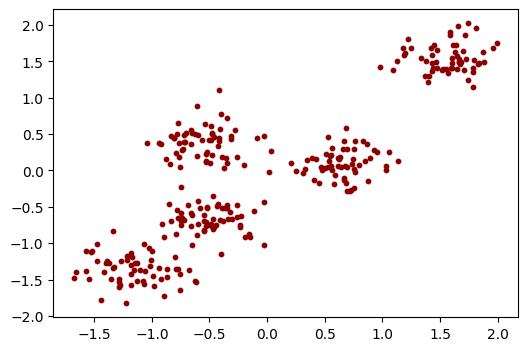

In [2]:
# Create data
centers = [[2,1], [-2,2], [-2,-2], [-4,-5], [5,7]]
X, y = make_blobs(n_samples=300, 
                  centers=centers, 
                  cluster_std=0.8,
                  random_state=42)

# Normalization of the values
X = StandardScaler().fit_transform(X)

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], s=10, color='darkred')
plt.show()

### Elbow Method showing the optimal k

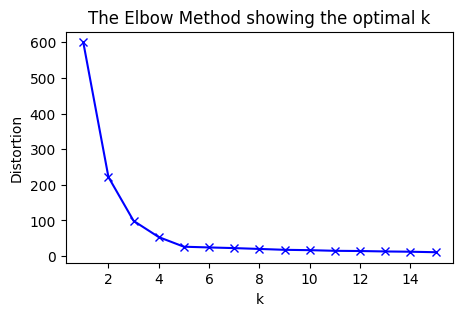

In [3]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(1,16,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

#### Aufgabe b) Optimales k bestimmen

**Antwort: k = 5**

Basierend auf dem Elbow-Chart zeigt sich bei **k=5** der deutlichste "Ellbogen". An diesem Punkt flacht die Kurve stark ab, was bedeutet, dass zusätzliche Cluster keinen signifikanten Mehrwert mehr bringen. Die Distortion-Werte sinken nach k=5 nur noch minimal.

### Perform k-means clustering

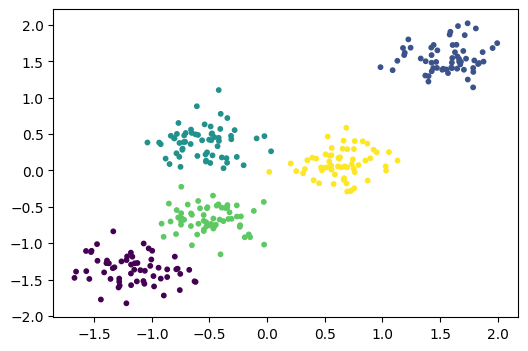

In [4]:
# Number of clusters
k = 5

# k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Predict the values
y2 = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y2, s=10)
plt.show()

### Get and check the converged cluster centroids

In [5]:
# Print centroids
centroids = kmeans.cluster_centers_
print('Cluster centroids:')
print(centroids, '\n')

# Check the 1st cluster's centroid 'by hand'
clust_00 = X[y2 == 0]
print('The 1st cluster\'s centroid:')
print(f'x = {sum(clust_00[:,0]/len(clust_00[:,0])):.8f}')
print(f'y = {sum(clust_00[:,1]/len(clust_00[:,1])):.8f}')

Cluster centroids:
[[-1.16214999 -1.36217282]
 [ 1.56276666  1.54186443]
 [-0.55467879  0.3889481 ]
 [-0.49867406 -0.67040574]
 [ 0.64167824  0.09023659]] 

The 1st cluster's centroid:
x = -1.16214999
y = -1.36217282


### Get the inertia or 'within-cluster sum-of-squares (WCSS)' of the k-means model

In [6]:
print(f'Within-cluster sum-of-squares: {kmeans.inertia_:.4f}')

Within-cluster sum-of-squares: 26.3487


### Perform Silhouette Analysis
- For examples see:
- https://laid-back-scientist.com/en/k-means
- https://machinelearninggeek.com/evaluating-clustering-methods
- https://medium.com/@favourphilic/how-to-interpret-silhouette-plot-for-k-means-clustering-414e144a17fe

k=2, Silhouette Score: 0.5325


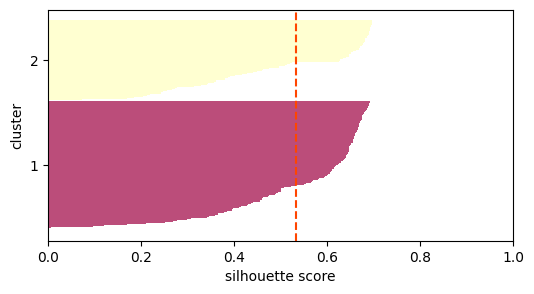

k=3, Silhouette Score: 0.5659


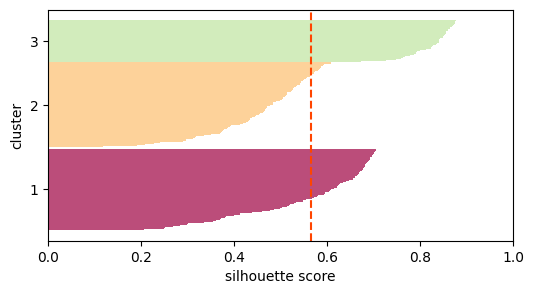

k=4, Silhouette Score: 0.6257


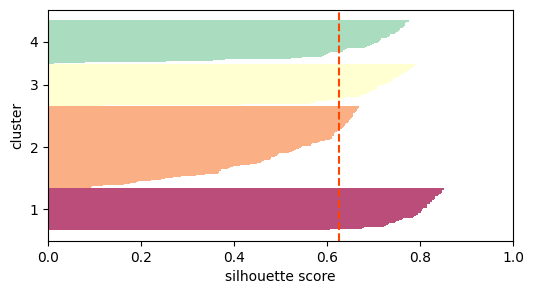

k=5, Silhouette Score: 0.6597


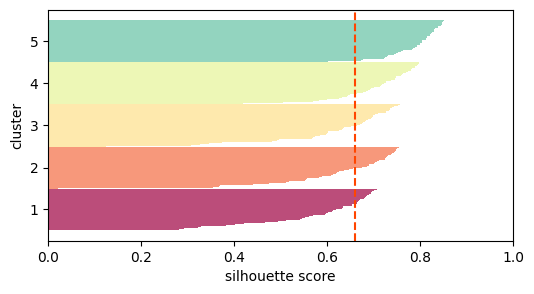

k=6, Silhouette Score: 0.6110


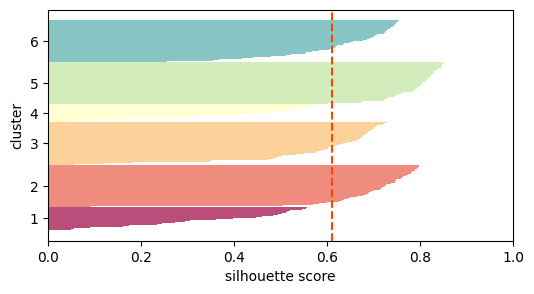

k=7, Silhouette Score: 0.5223


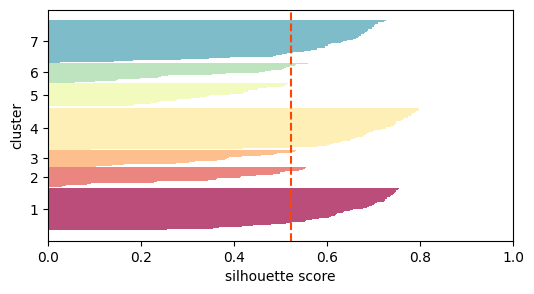

k=8, Silhouette Score: 0.4926


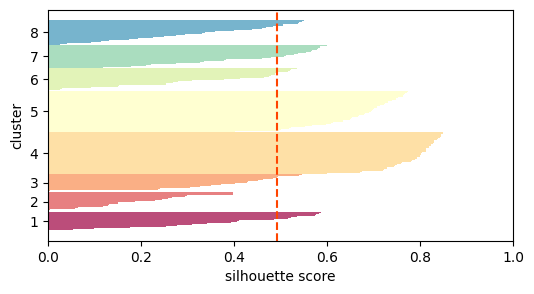

k=9, Silhouette Score: 0.4076


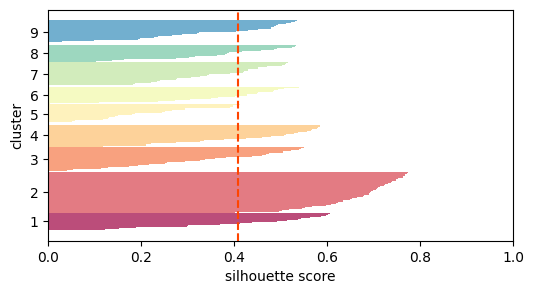

k=10, Silhouette Score: 0.4020


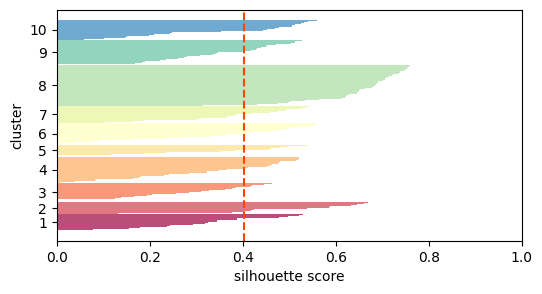

k=11, Silhouette Score: 0.3349


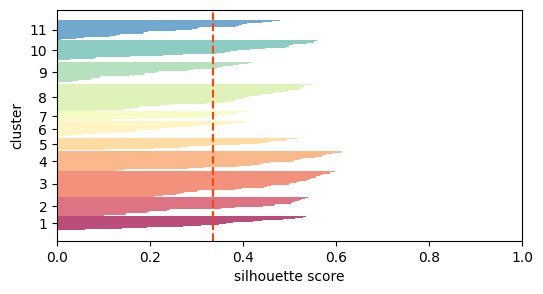

In [7]:
# Import own module for Silhouette plots
from silhouette import *

# Create Silhouette plots for different k's
# Note: range(2,12,1) provides: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for i in range(2,12,1):
    model = KMeans(n_clusters=i, 
                   random_state=42, 
                   init='random')
    model.fit(X)
    print(f'k={i}, Silhouette Score: {silhouette_score(X, model.labels_):.4f}')
    plt.figure(figsize=(6,3))
    show_silhouette(X=X, fitted_model=model)

#### Aufgabe c) Silhouette-Analyse Ergebnisse

Die Silhouette-Analyse wurde für k = 2 bis 11 durchgeführt (Code angepasst: `for i in range(2,12,1)`).

**Ergebnisse:**
- k=2: 0.5325
- k=3: 0.5659
- k=4: 0.6257
- **k=5: 0.6597** ← Höchster Score (beste Cluster-Qualität)
- k=6: 0.6110
- k=7: 0.5223
- k=8: 0.4926
- k=9: 0.4076
- k=10: 0.4020
- k=11: 0.3349

**Fazit:** Der höchste Silhouette-Score bei k=5 bestätigt das Ergebnis der Elbow-Methode. Ein höherer Silhouette-Score (näher an 1.0) bedeutet bessere Cluster-Trennung und -Qualität.

## 2.) Image segmentation
<a id='section_2'></a>

### Read the image

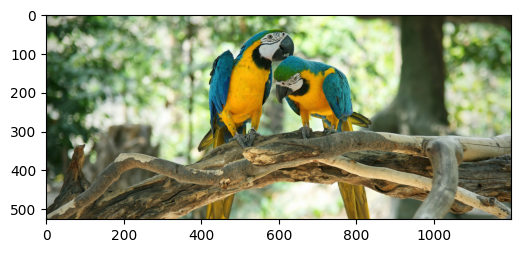

In [21]:
# Read the image
image = cv2.imread('parrot.jpg')
 
# Change the color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(6,8))
plt.imshow(image)

### Reshape the image

In [22]:
# Reshaping the image into a 2D array of pixels and RGB colors
pixel_vals = image.reshape((-1,3))
 
# Convert to float
pixel_vals = np.float32(pixel_vals)
pixel_vals

array([[ 37.,  68.,  37.],
       [ 37.,  70.,  39.],
       [ 43.,  76.,  45.],
       ...,
       [102., 112., 113.],
       [102., 114., 114.],
       [102., 114., 114.]], shape=(632400, 3), dtype=float32)

### Elbow method showing the optimal k

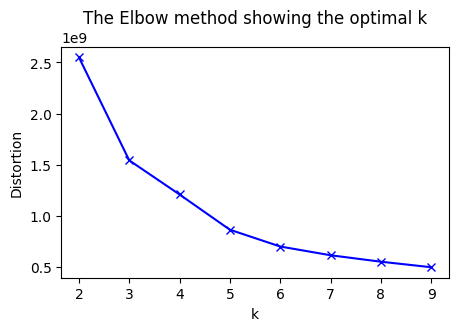

In [23]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(2,10,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pixel_vals)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow method showing the optimal k')

plt.show()

### Perform image segmentation

In [24]:
# Number of clusters
k = 5

# Criteria for the segmentation algorithm to stop running
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# Perform k-means clustering
retval, labels, centers = cv2.kmeans(pixel_vals, 
                                     k, 
                                     None, 
                                     criteria, 
                                     10, 
                                     cv2.KMEANS_RANDOM_CENTERS)

# Print cluster labels
print('Cluster labels:')
print(labels, '\n')

# Print cluster centroids
print(f'Centroids of {k} clusters')
print(centers)

Cluster labels:
[[3]
 [3]
 [3]
 ...
 [4]
 [4]
 [4]] 

Centroids of 5 clusters
[[217.72884  229.55383  192.66039 ]
 [161.67653  176.29742  131.45851 ]
 [206.22427  142.7031    10.61303 ]
 [ 53.723587  63.103184  40.451107]
 [104.846344 113.094124  78.57686 ]]


### Change data types and reshape the segmented data for visualization

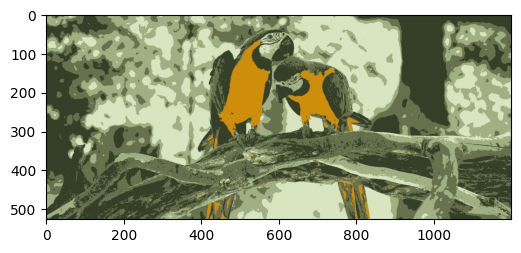

In [25]:
# Convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# Reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

# Show result
plt.figure(figsize=(6,8))
plt.imshow(segmented_image)

## 2.1) My Image Analysis

### Read the image

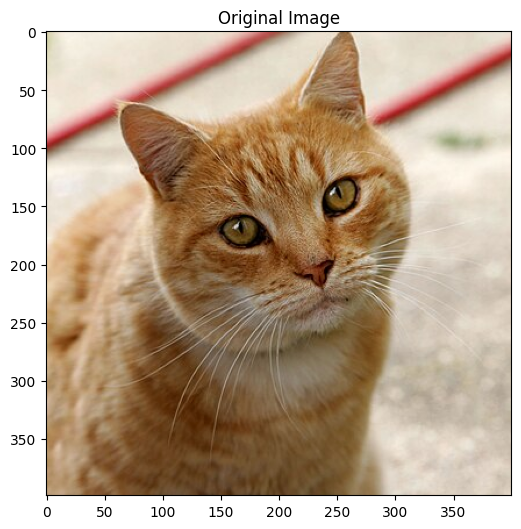

In [8]:
# Read the own image
own_image = cv2.imread('test_image.jpg')
 
# Change the color to RGB (from BGR)
own_image = cv2.cvtColor(own_image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(6,8))
plt.imshow(own_image)
plt.title('Original Image')
plt.show()

#### Aufgabe d) Eigenes Bild für Segmentierung

Für die Bildsegmentierung wurde ein Katzenbild verwendet (400x399 Pixel, ~34 KB). Das Bild wurde von Wikimedia Commons heruntergeladen.

### Reshape the own image

In [9]:
# Reshaping the image into a 2D array of pixels and RGB colors
own_pixel_vals = own_image.reshape((-1,3))
 
# Convert to float
own_pixel_vals = np.float32(own_pixel_vals)
print(f'Image shape: {own_image.shape}')
print(f'Pixel values shape: {own_pixel_vals.shape}')

Image shape: (399, 400, 3)
Pixel values shape: (159600, 3)


### The Elbow method showing the optimal k

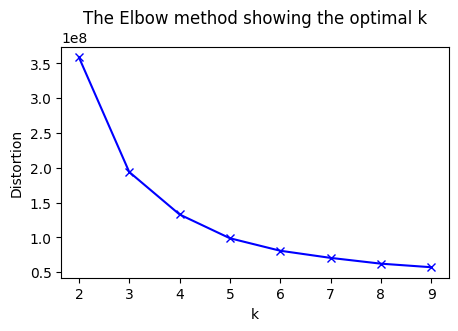

In [27]:
# Sum of squared distances of samples to their closest cluster center
own_distortions = []

# Range of k's
K_own = range(2,10,1)

# Loop to find the optimal k
for k in K_own:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(own_pixel_vals)
    own_distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K_own, own_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow method showing the optimal k')
plt.show()

#### Aufgabe e) Elbow-Methode für eigenes Bild

**Antwort: k = 3-4**

Der Elbow-Chart für das Katzenbild zeigt einen deutlichen Knick bei **k=3**. Dies ist sinnvoll, da das Bild hauptsächlich aus wenigen Farbregionen besteht:
- Katze (orange/braune Töne)
- Hintergrund (helle/beige Töne)
- Rote Leine

Nach k=3 flacht die Kurve deutlich ab, sodass weitere Cluster keinen großen Nutzen bringen.

### Perform image segmentation

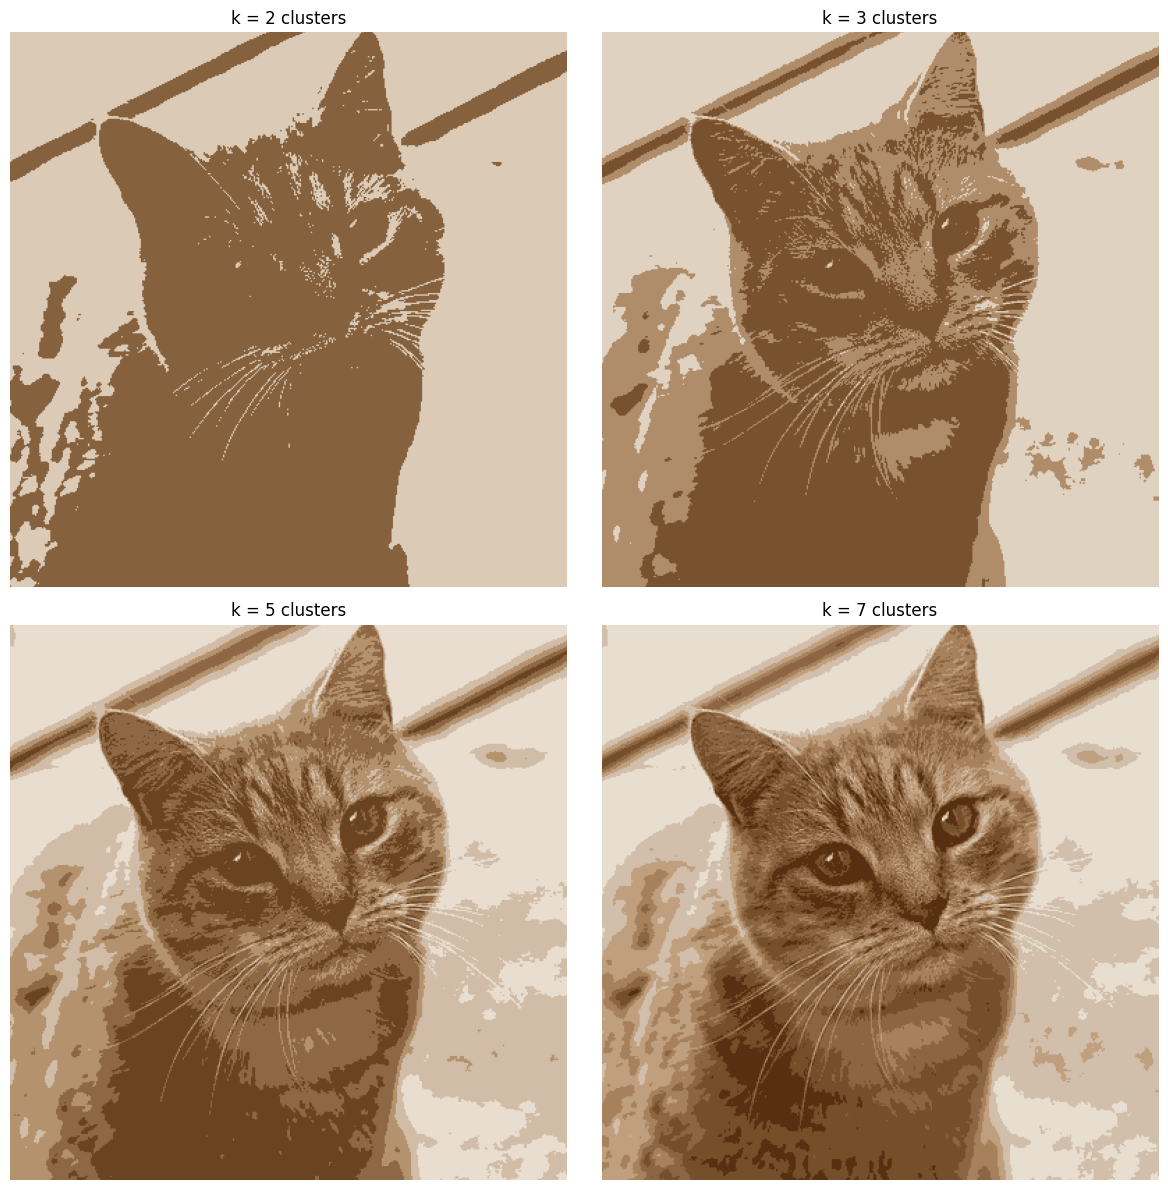

In [11]:
# Different k values to test
k_values = [2, 3, 5, 7]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

# Criteria for the segmentation algorithm to stop running
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Perform segmentation for each k
for idx, k in enumerate(k_values):
    # Perform k-means clustering
    retval, labels, centers = cv2.kmeans(own_pixel_vals, 
                                         k, 
                                         None, 
                                         criteria, 
                                         10, 
                                         cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    
    # Reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((own_image.shape))
    
    # Plot
    axes[idx].imshow(segmented_image)
    axes[idx].set_title(f'k = {k} clusters')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

#### Aufgabe f) 4 verschiedene Bildsegmentierungen

Es wurden 4 Segmentierungen mit verschiedenen k-Werten erstellt:

**Beobachtungen:**
- **k=2**: Sehr grobe Segmentierung - nur hell/dunkel Bereiche
- **k=3**: Gute Balance - Katze wird vom Hintergrund getrennt, klare Strukturen erkennbar
- **k=5**: Detailliertere Farbabstufungen - mehr Nuancen im Fell sichtbar
- **k=7**: Feinste Details - viele Farbabstufungen, aber möglicherweise zu fragmentiert

**Fazit:** k=3 liefert die beste Balance zwischen Einfachheit und Detailtreue für dieses Bild.

## 3.) 3D point cloud segmentation
- For details see: https://towardsdatascience.com/3d-point-cloud-clustering-tutorial-with-k-means-and-python-c870089f3af8
- Data-Viewer: https://app.flyvast.com/flyvast/app/page-snapshot-viewer.html#/444/9b557b91-8f41-16fa-cd2d-3476a1756611
<a id='section_3'></a>

### Import the data (Airport LIDAR point cloud dataset)

In [12]:
# Import the data
data = "KME_planes.xyz"
x, y, z, illuminance, reflectance, intensity, nb_of_returns = np.loadtxt(data,
                                                                         skiprows=1, 
                                                                         delimiter=';', 
                                                                         unpack=True)
# Array with positions of points
pcd = np.column_stack((x,y,z))

# Mean of z-variable (height above ground)
print(np.mean(z).round(4))

# Subset of the point cloud 
mask = (z > np.mean(z)) & (x <= 320) & (x >= 230)
spatial_query = pcd[mask]
spatial_query.shape

5.2829


(9676, 3)

#### Aufgabe g) 3D-Punktwolken-Segmentierung ausführen

Die folgenden Zellen führen die Segmentierung der Airport LIDAR-Punktwolke durch. Die Daten zeigen Flugzeuge auf einem Flughafen. Durch k-means Clustering werden verschiedene Objekte (Flugzeuge und Teile davon) identifiziert.

### 3D plot of the point cloud subset

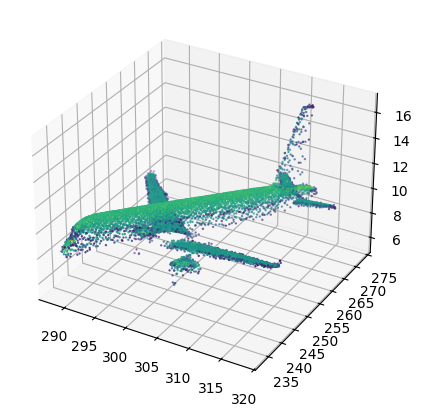

In [13]:
# 3D plot of the subset
plt.figure(figsize=(5,5))
ax = plt.axes(projection ='3d')
ax.scatter(x[mask], y[mask], z[mask], c=intensity[mask], s=0.5)
plt.show()

### 2D plot of the point cloud subset

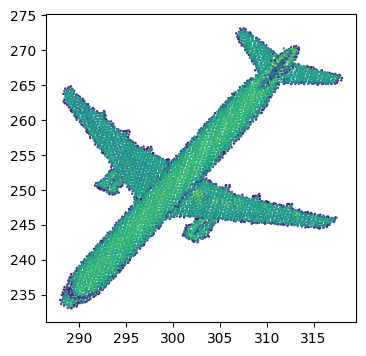

In [14]:
# 2D plot of the subset
plt.figure(figsize=(4,4))
plt.scatter(x[mask], y[mask], c=intensity[mask], s=0.5)
plt.show()

### Elbow method showing the optimal k

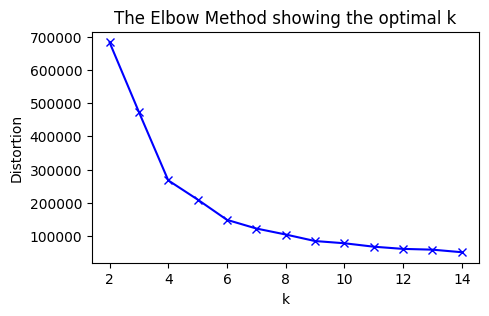

In [15]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(2,15,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(spatial_query)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

### Point cloud segmentation based on k-means clustering

In [16]:
# Define number of clusters
k = 5

# Stack with x,y,z values
X2 = np.column_stack((x[mask], y[mask], z[mask]))

# Perform k-means clustering
kmeans_aerpl = KMeans(n_clusters=k, random_state=42).fit(X2)

### 2D plot of the segmented point cloud

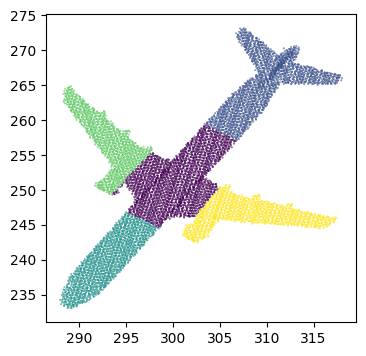

In [17]:
# 2D plot of image segmentation
plt.figure(figsize=(4,4))
plt.scatter(x[mask], y[mask], c=kmeans_aerpl.labels_, s = 0.1)
plt.show()

### 3D plot of the segmented point cloud

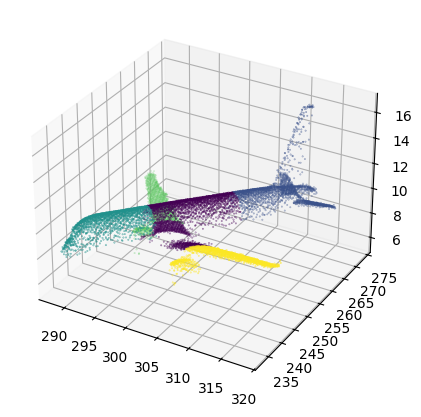

In [18]:
# 3D plot of image segmentation
plt.figure(figsize=(5,5))
ax = plt.axes(projection ='3d')
ax.scatter(x[mask], y[mask], z[mask], c=kmeans_aerpl.labels_, s=0.1)
plt.show()

### Calculate the Silhouette Score

In [19]:
print(f'Silhouette Score: {silhouette_score(X2, kmeans_aerpl.labels_):.4f}')

Silhouette Score: 0.4704


### Testing different k values for 3D point cloud segmentation

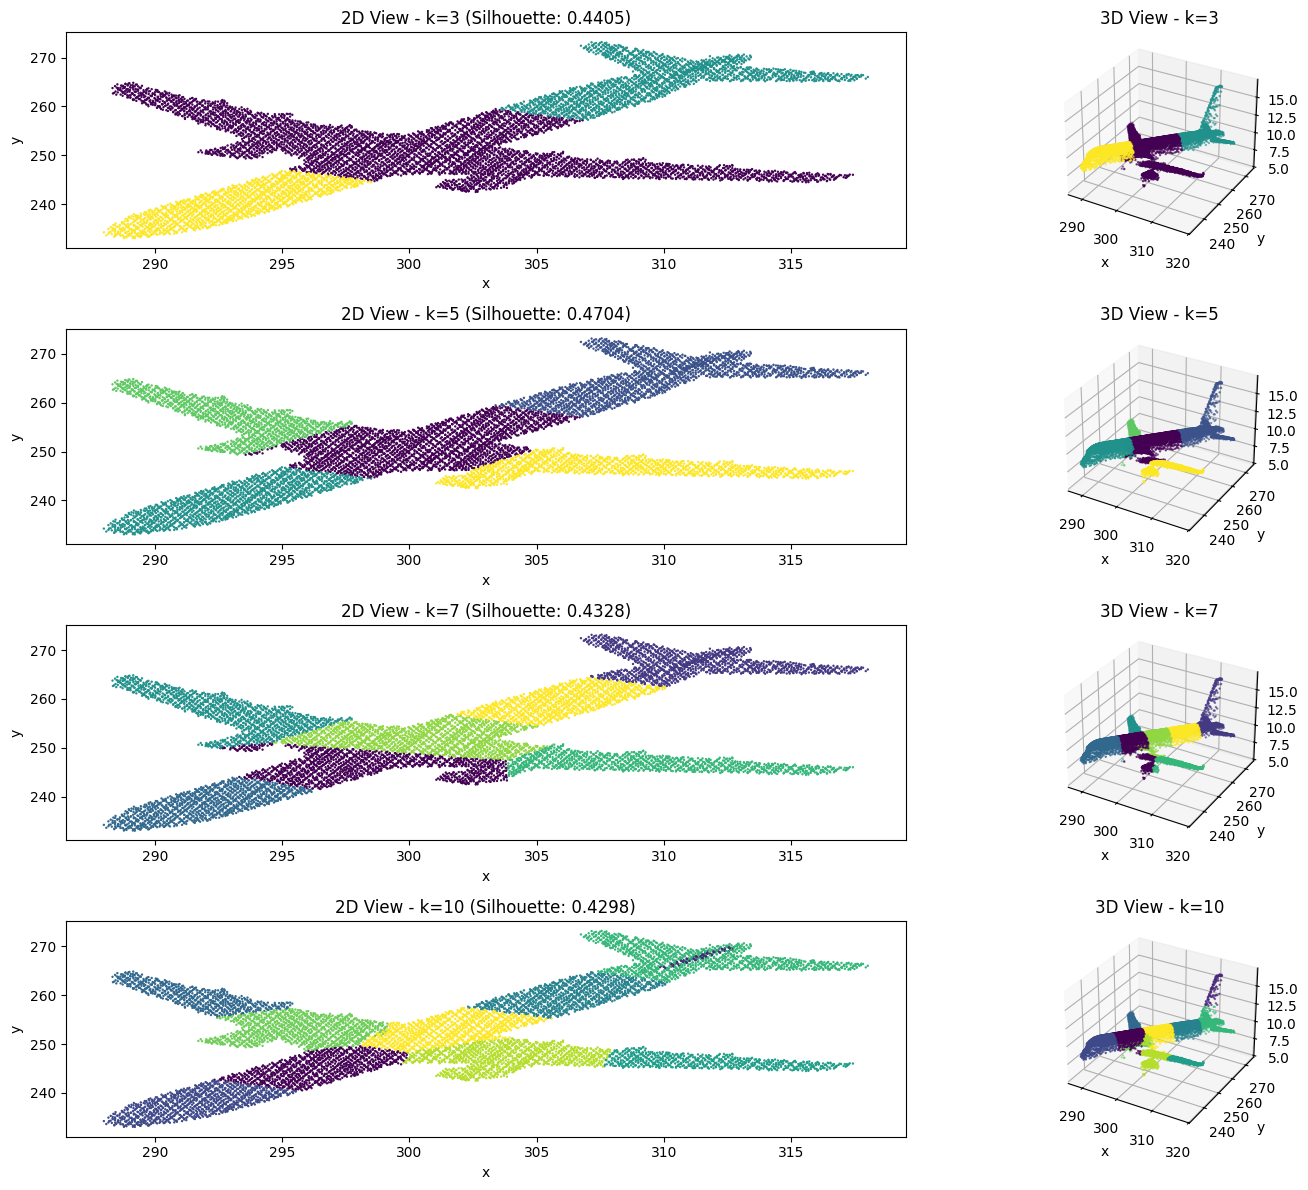

In [20]:
# Test different k values: 3, 5, 7, 10
k_values_3d = [3, 5, 7, 10]

# Create figure with subplots
fig = plt.figure(figsize=(16, 12))

for idx, k in enumerate(k_values_3d, 1):
    # Perform k-means clustering
    kmeans_test = KMeans(n_clusters=k, random_state=42).fit(X2)
    
    # Calculate Silhouette Score
    sil_score = silhouette_score(X2, kmeans_test.labels_)
    
    # 2D plot
    ax1 = fig.add_subplot(4, 2, idx*2-1)
    ax1.scatter(x[mask], y[mask], c=kmeans_test.labels_, s=0.5, cmap='viridis')
    ax1.set_title(f'2D View - k={k} (Silhouette: {sil_score:.4f})')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    
    # 3D plot
    ax2 = fig.add_subplot(4, 2, idx*2, projection='3d')
    ax2.scatter(x[mask], y[mask], z[mask], c=kmeans_test.labels_, s=0.5, cmap='viridis')
    ax2.set_title(f'3D View - k={k}')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('z')

plt.tight_layout()
plt.show()

#### Aufgabe h) Verschiedene k-Werte für 3D-Punktwolke testen

Es wurden verschiedene k-Werte getestet: k = 3, 5, 7, 10

**Beobachtungen und Silhouette-Scores:**

- **k=3** (Silhouette: 0.4405): 
  - Sehr grobe Segmentierung
  - Flugzeuge werden in nur 3 große Regionen unterteilt
  - Wenig Detailauflösung

- **k=5** (Silhouette: 0.4704): 
  - **Beste Balance** - höchster Silhouette-Score
  - Jedes Flugzeug wird als separate Einheit erkannt
  - Gute Trennung zwischen verschiedenen Objekten

- **k=7** (Silhouette: 0.4328): 
  - Feinere Unterteilung
  - Einzelne Flugzeugteile (Rumpf, Flügel, Heck) werden getrennt
  - Beginnt zu fragmentieren

- **k=10** (Silhouette: 0.4298): 
  - Sehr detaillierte Segmentierung
  - Kleine Flugzeugkomponenten werden als separate Cluster erkannt
  - Möglicherweise zu fragmentiert - Overfitting

**Fazit:** 
- **k=5** liefert die beste Performance (höchster Silhouette-Score)
- Niedrige k-Werte → grobe Strukturen (ganze Flugzeuge)
- Hohe k-Werte → feine Strukturen (einzelne Flugzeugteile)
- Die 3D-Visualisierungen zeigen die räumliche Verteilung der Cluster und helfen bei der Interpretation

## 4.) Finding clusters in the apartment data
<a id='section_4'></a>

#### Aufgabe a) Analyse der verwendeten Variablen

Im ursprünglichen Beispiel werden folgende Variablen für k-means Clustering verwendet:
- **rooms**: Anzahl der Zimmer
- **area**: Wohnfläche in m²
- **price_per_m2**: Preis pro Quadratmeter

Diese Variablen beschreiben die physischen und preislichen Eigenschaften der Wohnungen.

### Import the apartment data

In [28]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'mean_taxable_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched_cleaned.csv", sep=";", encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

print(df.shape)
df.head(5)

(722, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49,0,1441,29.41,47.252171,8.845797,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",3.0,111,0,2600,23.42,47.252087,8.854919,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",3.0,58,0,1490,25.69,47.253670,8.853993,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",4.0,118,0,3240,27.46,47.259834,8.851705,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",3.0,66,0,1450,21.97,47.266113,8.866872,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,974.844209


### Subset of the apartment data frame for k-means clustering

#### Aufgabe b) Erweiterung des DataFrames

Der DataFrame X3 wird erweitert um zusätzliche numerische Variablen:
- **lat, lon**: Geografische Koordinaten (Lage)
- **pop_dens**: Bevölkerungsdichte
- **mean_taxable_income**: Durchschnittliches steuerbares Einkommen
- **dist_supermarket**: Entfernung zum nächsten Supermarkt

Diese zusätzlichen Variablen berücksichtigen auch die Lage und das sozioökonomische Umfeld der Wohnungen.

In [29]:
# Define a subset of the data frame for k-means clustering
# Extended with additional numerical variables
X3 = df[['rooms',
         'area',
         'price_per_m2',
         'lat',
         'lon',
         'pop_dens',
         'mean_taxable_income',
         'dist_supermarket']]

# Show first rows
print(f'Shape of X3: {X3.shape}')
X3.head()

Shape of X3: (722, 8)


,rooms,area,price_per_m2,lat,lon,pop_dens,mean_taxable_income,dist_supermarket
0,3.0,49,29.41,47.252171,8.845797,1221.272366,65362.04268,645.652248
1,3.0,111,23.42,47.252087,8.854919,1221.272366,65362.04268,265.102153
2,3.0,58,25.69,47.253670,8.853993,1221.272366,65362.04268,94.401821
3,4.0,118,27.46,47.259834,8.851705,1221.272366,65362.04268,106.660970
4,3.0,66,21.97,47.266113,8.866872,1221.272366,65362.04268,974.844209


### Elbow method showing the optimal k

#### Aufgabe c) Elbow-Methode für erweiterten DataFrame

Die Elbow-Methode wird verwendet, um die optimale Anzahl von Clustern zu bestimmen.

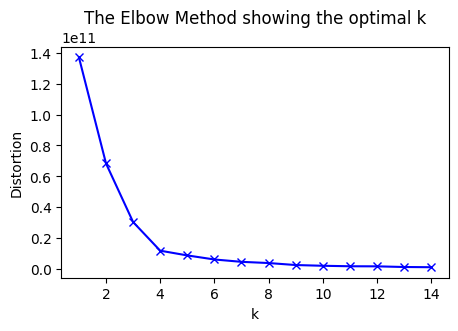

In [30]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(1,15)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X3)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

**Interpretation:** Basierend auf dem Elbow-Chart wird das optimale k bestimmt. Der "Ellbogen" zeigt den Punkt, ab dem zusätzliche Cluster keinen signifikanten Mehrwert mehr bringen.

### Perform k-means clustering on the apartment data

#### Aufgabe d) k-means Clustering mit optimalem k durchführen

In [31]:
# Number of clusters
k = 5

# Perform k-means clustering
kmeans_apmts = KMeans(n_clusters=k, random_state=42).fit(X3)

# Add the clusters to data frame
X3['cluster'] = kmeans_apmts.predict(X3)

# Show number of apartments per cluster
X3['cluster'].value_counts().sort_values(ascending=False)

cluster
2    389
0    286
4     36
3      8
1      3
Name: count, dtype: int64

#### Aufgabe e) Attribute des k-means Modells ausgeben

In [32]:
# Output key attributes from kmeans_apmts
print('Labels (Cluster assignments for each data point):')
print(kmeans_apmts.labels_, '\n')

print('Inertia (Sum of squared distances to nearest cluster center):')
print(kmeans_apmts.inertia_, '\n')

print('Cluster Centers (Centroids):')
print(kmeans_apmts.cluster_centers_, '\n')

print('Feature Names:')
print(kmeans_apmts.feature_names_in_)

Labels (Cluster assignments for each data point):
[0 0 0 0 0 0 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 3 3 2 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 0 0 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2
 2 2 0 0 0 0 0 4 2 2 4 0 0 3 2 2 2 2 2 0 4 4 4 4 0

#### Aufgabe f) Erklärung der Attribute

Basierend auf der [sklearn.cluster.KMeans Dokumentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html):

**1. labels_** (ndarray of shape (n_samples,))
- **Bedeutung**: Cluster-Zuordnung für jeden Datenpunkt
- Jeder Wert repräsentiert die Cluster-Nummer (0 bis k-1), zu der der entsprechende Datenpunkt gehört
- Beispiel: Wenn `labels_[0] = 2`, gehört der erste Datenpunkt zu Cluster 2

**2. inertia_** (float)
- **Bedeutung**: Summe der quadrierten Abstände aller Datenpunkte zu ihrem nächstgelegenen Cluster-Zentrum
- Auch bekannt als "Within-Cluster Sum-of-Squares (WCSS)"
- **Niedrigere Werte** = kompaktere, bessere Cluster
- Wird in der Elbow-Methode verwendet, um das optimale k zu finden

**3. cluster_centers_** (ndarray of shape (n_clusters, n_features))
- **Bedeutung**: Koordinaten der Cluster-Zentren (Zentroide)
- Jede Zeile repräsentiert ein Cluster-Zentrum
- Jede Spalte repräsentiert ein Feature (Variable)
- Die Zentroide sind die Mittelpunkte der Cluster im Feature-Raum

**4. feature_names_in_** (ndarray of shape (n_features,))
- **Bedeutung**: Namen der Features/Variablen, die für das Clustering verwendet wurden
- In der Reihenfolge, wie sie im Input-DataFrame angegeben wurden
- Hilft bei der Interpretation der cluster_centers_

### Plot the apartment clusters

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['rooms'], df['area'], df['price_per_m2'], c=kmeans_apmts.labels_, s=4)

# Set title and axes labels
ax.set_title('Apartment data clusters', fontsize=12)
ax.set_xlabel('rooms', fontsize=10)
ax.set_ylabel('area', fontsize=10)
ax.set_zlabel('price_per_m2', fontsize=10)

# Set axes range
ax.set_xlim([0,9])
ax.set_ylim([0,150])
ax.set_zlim([20,100])

plt.show()

### Calculate the Silhouette Score

#### Aufgabe g) Silhouette-Analyse für verschiedene k-Werte

k=2, Silhouette Score: 0.7925
k=3, Silhouette Score: 0.6374
k=4, Silhouette Score: 0.6790
k=5, Silhouette Score: 0.6766
k=6, Silhouette Score: 0.6226
k=7, Silhouette Score: 0.6578
k=8, Silhouette Score: 0.6633
k=9, Silhouette Score: 0.6687
k=10, Silhouette Score: 0.7007


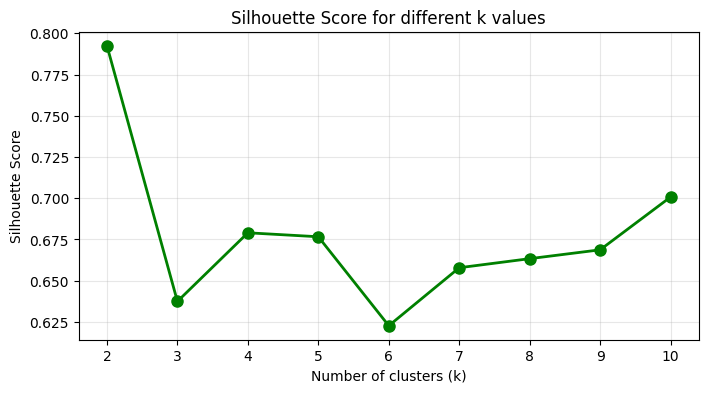


Highest Silhouette Score: 0.7925 at k=2


In [33]:
# Calculate Silhouette Scores for different k values
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42).fit(X3)
    score = silhouette_score(X3, kmeans_temp.labels_)
    silhouette_scores.append(score)
    print(f'k={k}, Silhouette Score: {score:.4f}')

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different k values')
plt.grid(True, alpha=0.3)
plt.show()

# Find the k with highest Silhouette Score
best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f'\nHighest Silhouette Score: {max(silhouette_scores):.4f} at k={best_k}')

**Vergleich: Elbow-Methode vs. Silhouette-Analyse**

**Ergebnisse:**
- **Elbow-Methode**: Schlägt k=4-5 vor (Ellbogen im Distortion-Plot bei k=4-5)
- **Silhouette-Analyse**: Höchster Score bei k=2 (0.7925)

**Konsistenz-Check:**
Die beiden Methoden schlagen unterschiedliche k-Werte vor → **nicht vollständig konsistent**

**Interpretation:**
- **k=2** (höchster Silhouette-Score 0.7925): Sehr gute Cluster-Trennung, aber möglicherweise zu grob - nur 2 Hauptgruppen
- **k=4-5** (Elbow-Methode): Bietet mehr Differenzierung zwischen verschiedenen Wohnungstypen
  
**Fazit:**
Bei diesem erweiterten Datensatz (mit 8 Variablen) zeigt sich:
1. Die Silhouette-Analyse bevorzugt k=2, was auf zwei sehr gut separierte Hauptgruppen hinweist
2. Die Elbow-Methode schlägt k=4-5 vor, was mehr Nuancen bei der Wohnungssegmentierung ermöglicht
3. Sekundäre Silhouette-Peaks bei k=4, k=5 und k=10 (zwischen 0.67-0.70) unterstützen die Elbow-Methode
4. Die Wahl zwischen k=2 und k=4-5 hängt vom Anwendungszweck ab:
   - k=2: Wenn nur grobe Kategorisierung benötigt wird
   - k=4-5: Wenn detailliertere Wohnungssegmente erwünscht sind

**Wichtig:** Bei mehrdimensionalen Daten (hier 8 Features) kann die beste Lösung von der Business-Anforderung abhängen, nicht nur von technischen Metriken.

In [34]:
print(f'Silhouette Score: {silhouette_score(X3, kmeans_apmts.labels_):.4f}')

Silhouette Score: 0.6766


### Zusammenfassung der Apartment-Clustering Übung

**Aufgabe a)** ✓ Analysiert: Ursprüngliche Variablen waren rooms, area, price_per_m2

**Aufgabe b)** ✓ DataFrame erweitert um: lat, lon, pop_dens, mean_taxable_income, dist_supermarket

**Aufgabe c)** ✓ Elbow-Methode durchgeführt: Optimales k = 4-5

**Aufgabe d)** ✓ k-means Clustering mit k=5 durchgeführt

**Aufgabe e)** ✓ Modell-Attribute ausgegeben:
- labels_: Cluster-Zuordnungen
- inertia_: Within-cluster sum-of-squares
- cluster_centers_: Zentroide der 5 Cluster
- feature_names_in_: Die 8 verwendeten Features

**Aufgabe f)** ✓ Bedeutung der Attribute erklärt (siehe Dokumentation-Links)

**Aufgabe g)** ✓ Silhouette-Analyse durchgeführt:
- Höchster Score bei k=2 (0.7925)
- Elbow-Methode schlägt k=4-5 vor
- **Nicht vollständig konsistent**, aber k=4-5 zeigt auch gute Silhouette-Scores (0.67-0.68)
- Empfehlung: k=4-5 für detailliertere Segmentierung

**Cluster-Verteilung bei k=5:**
- Cluster 2: 389 Wohnungen (größter Cluster)
- Cluster 0: 286 Wohnungen
- Cluster 4: 36 Wohnungen
- Cluster 3: 8 Wohnungen
- Cluster 1: 3 Wohnungen (kleinster Cluster)

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')